In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
sim_output = pd.read_pickle("sim_output_for_figure.pickle")

/tmp/ipykernel_372230/370911555.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_ = sim_output.query("`N molecules` == @n_mol & `Diffraction Criterion` == 'Rayleigh'").groupby(["Length (micron)", "Width (micron)"], as_index=False).mean().pivot("Length (micron)", "Width (micron)", "% error")
/tmp/ipykernel_372230/370911555.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_ = sim_output.query("`N molecules` == @n_mol & `Diffraction Criterion` == 'Rayleigh'").groupby(["Length (micron)", "Width (micron)"], as_index=False).mean().pivot("Length (micron)", "Width (micron)", "% error")
/tmp/ipykernel_372230/370911555.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_ = 

KeyboardInterrupt: 

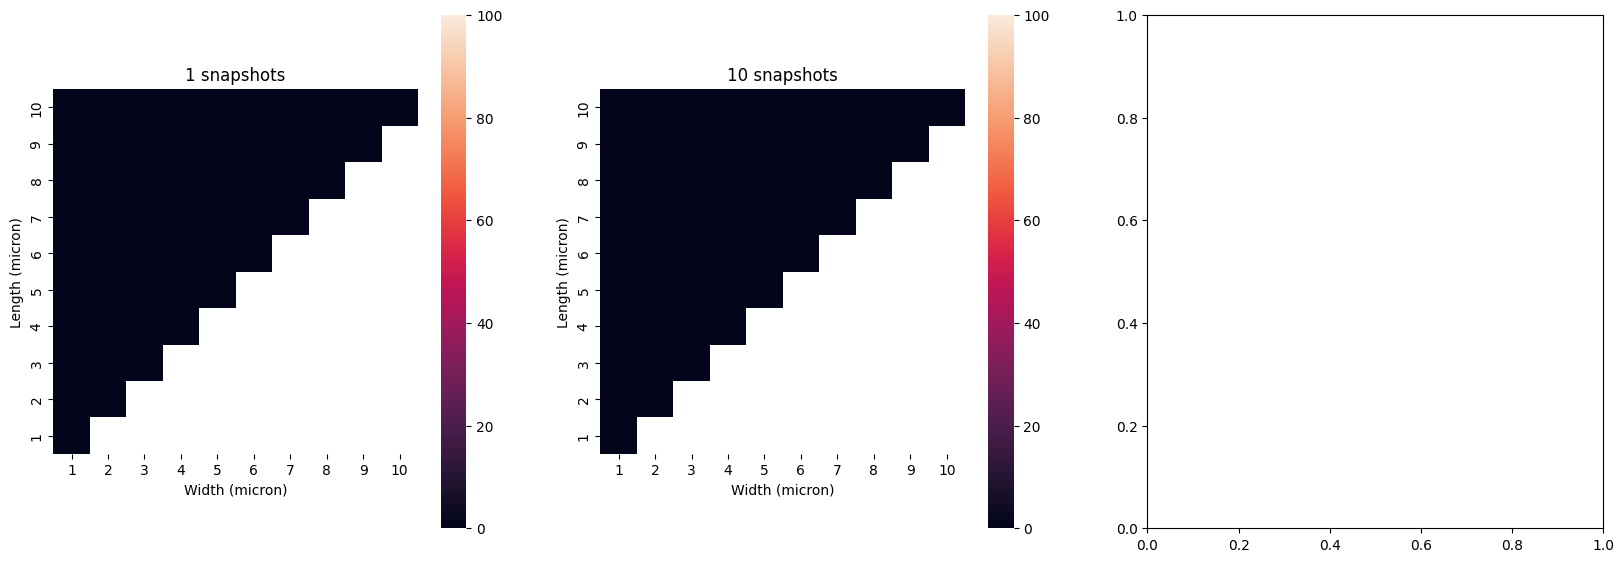

In [103]:
for n_mol in sim_output["N molecules"].unique()[::4]:
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,20/3))
    
    for axis, n_snapshots in zip((ax1, ax2, ax3), (1, 10, 100)):
        if n_snapshots == 100:
            cbar=True
        else:
            cbar=False
        if n_snapshots == 1:
            data_ = sim_output.query("`N molecules` == @n_mol & `Diffraction Criterion` == 'Rayleigh'").groupby(["Length (micron)", "Width (micron)"], as_index=False).mean().pivot("Length (micron)", "Width (micron)", "% error")
        else:
            data_ = sim_output.query("`N molecules` == @n_mol & `Diffraction Criterion` == 'Rayleigh'").groupby(["Length (micron)", "Width (micron)"], as_index=False).sample(n_snapshots).groupby(["Length (micron)", "Width (micron)"], as_index=False).min().pivot("Length (micron)", "Width (micron)", "% error")
            for x in range(10):
                data_ += sim_output.query("`N molecules` == @n_mol & `Diffraction Criterion` == 'Rayleigh'").groupby(["Length (micron)", "Width (micron)"], as_index=False).sample(n_snapshots).groupby(["Length (micron)", "Width (micron)"], as_index=False).min().pivot("Length (micron)", "Width (micron)", "% error")
            data_ /= 11
        axis.set_title(f"{n_snapshots} snapshots")
        ax = sns.heatmap(data = data_, vmin=0, vmax=100, square = True, ax=axis)
        ax.invert_yaxis()
    plt.suptitle(f"N molecules = {n_mol}, percent error based on number of snapshots")
    plt.savefig(f"diagnostics/{n_mol}.png")
    plt.show()
    
                                 
                                 



/tmp/ipykernel_98099/2832428345.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  change_dim_data = sim_output.query("`N molecules` == @n_mol & `Diffraction Criterion` == 'Rayleigh'").groupby(["Length (micron)", "Width (micron)"], as_index=False).mean(numeric_only=True).pivot("Length (micron)", "Width (micron)", "% error")


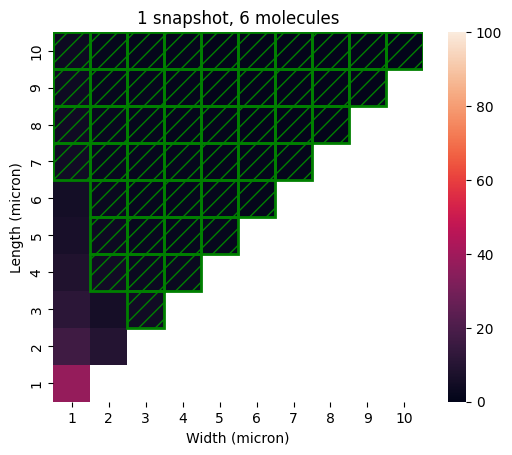

In [5]:
n_mol = 6
change_dim_data = sim_output.query("`N molecules` == @n_mol & `Diffraction Criterion` == 'Rayleigh'").groupby(["Length (micron)", "Width (micron)"], as_index=False).mean(numeric_only=True).pivot("Length (micron)", "Width (micron)", "% error")
ax = sns.heatmap(data = change_dim_data, vmin=0, vmax=100, square = True)
ax.invert_yaxis()
array_data = np.array(change_dim_data)
for i in range(array_data.shape[0]):
    for j in range(array_data.shape[1]):
        if array_data[j,i] < 5:
            ax.add_patch(Rectangle((i, j), 1, 1, ec='green', fc='none', lw=2, hatch='//'))
plt.title(f"1 snapshot, {n_mol} molecules")
plt.show()

/tmp/ipykernel_372230/4229767132.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  change_dim_data = sim_output.query("`N molecules` == @n_mol & `Diffraction Criterion` == 'Rayleigh'").groupby(["Length (micron)", "Width (micron)"], as_index=False).sample(n_snapshots).groupby(["Length (micron)", "Width (micron)"], as_index=False).min().pivot("Length (micron)", "Width (micron)", "% error")
/tmp/ipykernel_372230/4229767132.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  change_dim_data += sim_output.query("`N molecules` == @n_mol & `Diffraction Criterion` == 'Rayleigh'").groupby(["Length (micron)", "Width (micron)"], as_index=False).sample(n_snapshots).groupby(["Length (micron)", "Width (micron)"], as_index=False).min().pivot("Length (micron)", "Width (micron)", "% error")
/tmp/ipykernel_372230/4229767132.py:3: FutureWarning: In a future version of pandas all arguments of 

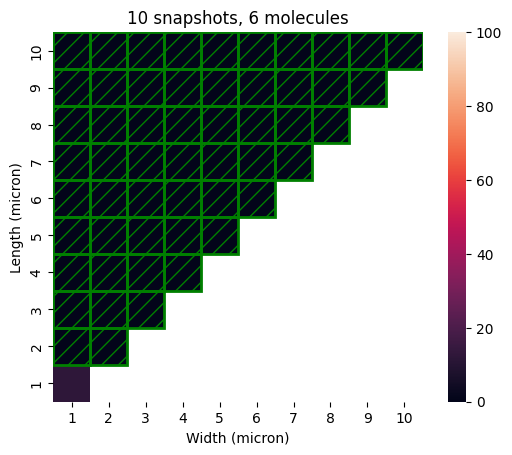

In [228]:
change_dim_data = sim_output.query("`N molecules` == @n_mol & `Diffraction Criterion` == 'Rayleigh'").groupby(["Length (micron)", "Width (micron)"], as_index=False).sample(n_snapshots).groupby(["Length (micron)", "Width (micron)"], as_index=False).min().pivot("Length (micron)", "Width (micron)", "% error")
for x in range(10):
    change_dim_data += sim_output.query("`N molecules` == @n_mol & `Diffraction Criterion` == 'Rayleigh'").groupby(["Length (micron)", "Width (micron)"], as_index=False).sample(n_snapshots).groupby(["Length (micron)", "Width (micron)"], as_index=False).min().pivot("Length (micron)", "Width (micron)", "% error")
change_dim_data /= 11
ax = sns.heatmap(data = change_dim_data, vmin=0, vmax=100, square = True)
ax.invert_yaxis()
array_data = np.array(change_dim_data)
for i in range(array_data.shape[0]):
    for j in range(array_data.shape[1]):
        if array_data[j,i] < 5:
            ax.add_patch(Rectangle((i, j), 1, 1, ec='green', fc='none', lw=2, hatch='//'))
plt.title(f"10 snapshots, {n_mol} molecules")
plt.show()

/tmp/ipykernel_372230/2411968716.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_ = sim_output.query("`N molecules` == @n_mol & `Diffraction Criterion` == 'Rayleigh'").groupby(["Length (micron)", "Width (micron)"], as_index=False).mean().pivot("Length (micron)", "Width (micron)", "% error")
/tmp/ipykernel_372230/2411968716.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_ = sim_output.query("`N molecules` == @n_mol & `Diffraction Criterion` == 'Rayleigh'").groupby(["Length (micron)", "Width (micron)"], as_index=False).mean().pivot("Length (micron)", "Width (micron)", "% error")
/tmp/ipykernel_372230/2411968716.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_

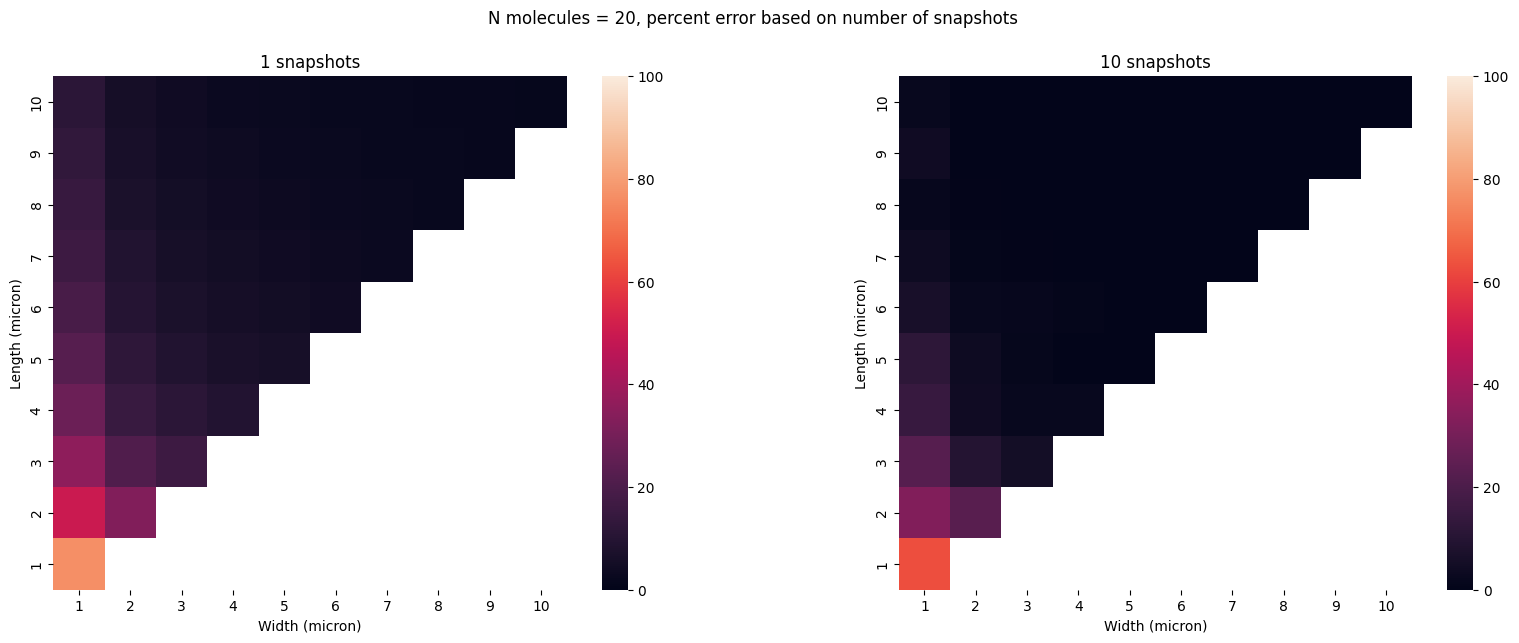

In [185]:
n_mol = 20
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20/3))

for axis, n_snapshots in zip((ax1, ax2), (1, 10)):
    if n_snapshots == 100:
        cbar=True
    else:
        cbar=False
    if n_snapshots == 1:
        data_ = sim_output.query("`N molecules` == @n_mol & `Diffraction Criterion` == 'Rayleigh'").groupby(["Length (micron)", "Width (micron)"], as_index=False).mean().pivot("Length (micron)", "Width (micron)", "% error")
    else:
        data_ = sim_output.query("`N molecules` == @n_mol & `Diffraction Criterion` == 'Rayleigh'").groupby(["Length (micron)", "Width (micron)"], as_index=False).sample(n_snapshots).groupby(["Length (micron)", "Width (micron)"], as_index=False).min().pivot("Length (micron)", "Width (micron)", "% error")
        for x in range(10):
            data_ += sim_output.query("`N molecules` == @n_mol & `Diffraction Criterion` == 'Rayleigh'").groupby(["Length (micron)", "Width (micron)"], as_index=False).sample(n_snapshots).groupby(["Length (micron)", "Width (micron)"], as_index=False).min().pivot("Length (micron)", "Width (micron)", "% error")
        data_ /= 11
    axis.set_title(f"{n_snapshots} snapshots")
    ax = sns.heatmap(data = data_, vmin=0, vmax=100, square = True, ax=axis)
    ax.invert_yaxis()
plt.suptitle(f"N molecules = {n_mol}, percent error based on number of snapshots")
plt.savefig(f"diagnostics/{n_mol}.png")
plt.show()

/tmp/ipykernel_372230/1172565213.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  n_vs_obs_data = sim_output.query("`Length (micron)` == 2 & `Width (micron)` == 1 & `Diffraction Criterion` == 'Rayleigh'").groupby(["N molecules", "Observed molecules"], as_index=False).count().pivot("N molecules", "Observed molecules", "% error").T


Text(0.5, 1.0, '1 snapshot, Length = 2 micron, Width = 1 micron')

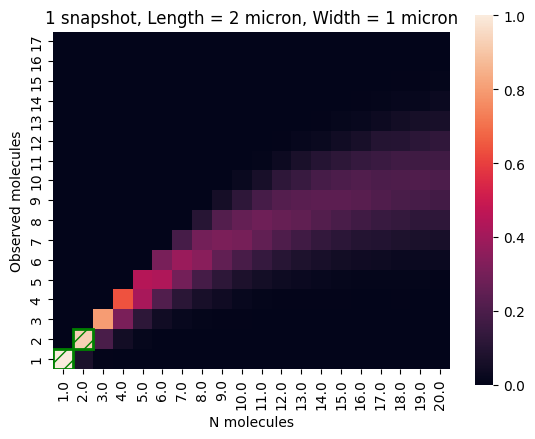

In [179]:
n_vs_obs_data = sim_output.query("`Length (micron)` == 2 & `Width (micron)` == 1 & `Diffraction Criterion` == 'Rayleigh'").groupby(["N molecules", "Observed molecules"], as_index=False).count().pivot("N molecules", "Observed molecules", "% error").T 
n_vs_obs_data /= 5000
n_vs_obs_data = n_vs_obs_data.fillna(0)
ax = sns.heatmap(data = n_vs_obs_data, vmin=0, vmax=1, square = True)
ax.invert_yaxis()
array_data = np.array(n_vs_obs_data)
for i in range(array_data.shape[0]):
    for j in range(array_data.shape[1]):
        if array_data[i,j] > 0.9:
            ax.add_patch(Rectangle((i, j), 1, 1, ec='green', fc='none', lw=2, hatch='//'))
plt.title("1 snapshot, Length = 2 micron, Width = 1 micron")

/tmp/ipykernel_98099/8606641.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  n_vs_obs_data_10_snapshots = n_vs_obs_data_10_snapshots.groupby(["N molecules", "Observed molecules"], as_index=False).count().pivot("N molecules", "Observed molecules", "% error").T /100


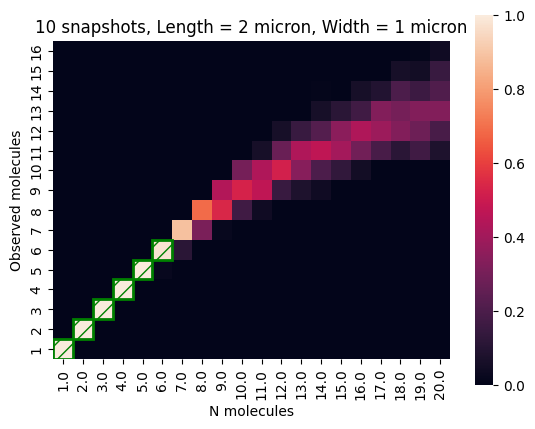

In [6]:
n_vs_obs_data_10_snapshots = pd.concat([sim_output.query("`Length (micron)` == 2 & `Width (micron)` == 1 & `Diffraction Criterion` == 'Rayleigh'").groupby(["N molecules"], as_index=False).sample(10).groupby(["N molecules"], as_index=False).max() for _ in range(100)])
n_vs_obs_data_10_snapshots = n_vs_obs_data_10_snapshots.groupby(["N molecules", "Observed molecules"], as_index=False).count().pivot("N molecules", "Observed molecules", "% error").T /100
n_vs_obs_data_10_snapshots = n_vs_obs_data_10_snapshots.fillna(0)

ax = sns.heatmap(data = n_vs_obs_data_10_snapshots, vmin=0, vmax=1, square = True)
ax.invert_yaxis()
array_data = np.array(n_vs_obs_data_10_snapshots)
for i in range(array_data.shape[0]):
    for j in range(array_data.shape[1]):
        if array_data[i,j] > 0.9:
            ax.add_patch(Rectangle((i, j), 1, 1, ec='green', fc='none', lw=2, hatch='//'))
plt.title("10 snapshots, Length = 2 micron, Width = 1 micron")
plt.show()

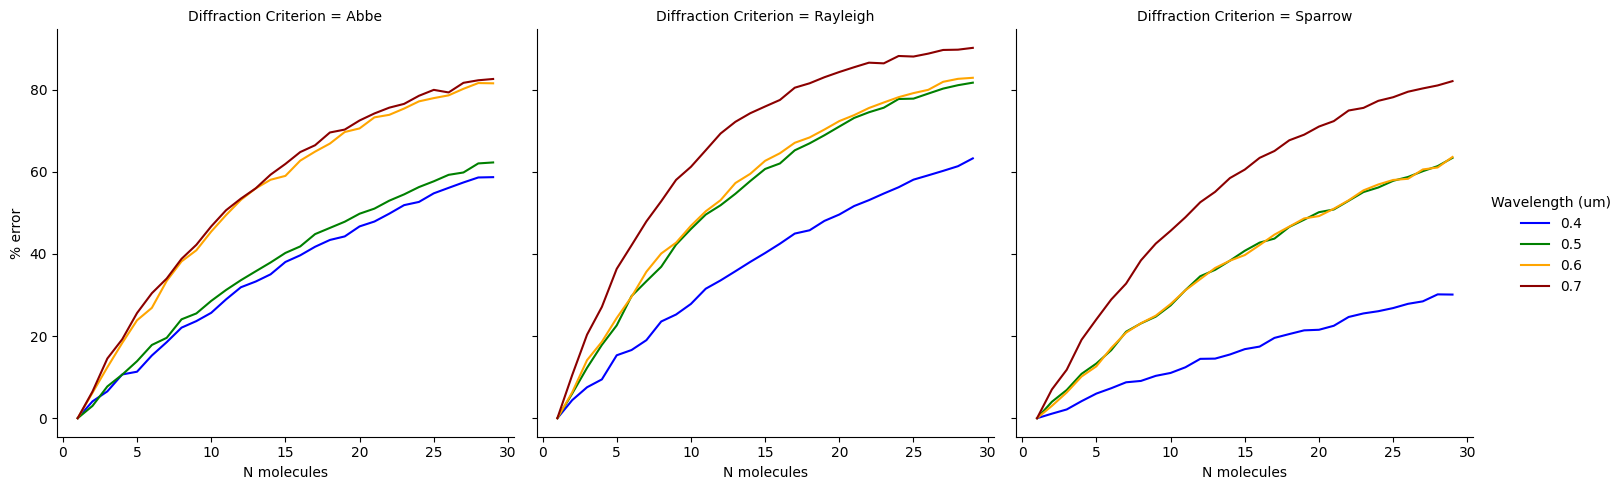

In [7]:
wavelength_colours = ["blue", "g", "orange", "darkred"] 
data = sim_output.groupby(["Length (micron)", "Width (micron)", "N molecules", "Wavelength (um)", "Diffraction Criterion", "Cell volume (micron^3)", "Aspect ratio"], as_index=False).mean().query("`Length (micron)` == 2 & `Width (micron)` == 1")
data["Wavelength (um)"] = data["Wavelength (um)"].astype("category")
sns.relplot(data = data, x = "N molecules", y = "% error", hue = "Wavelength (um)", col = "Diffraction Criterion", kind = "line", palette=wavelength_colours)

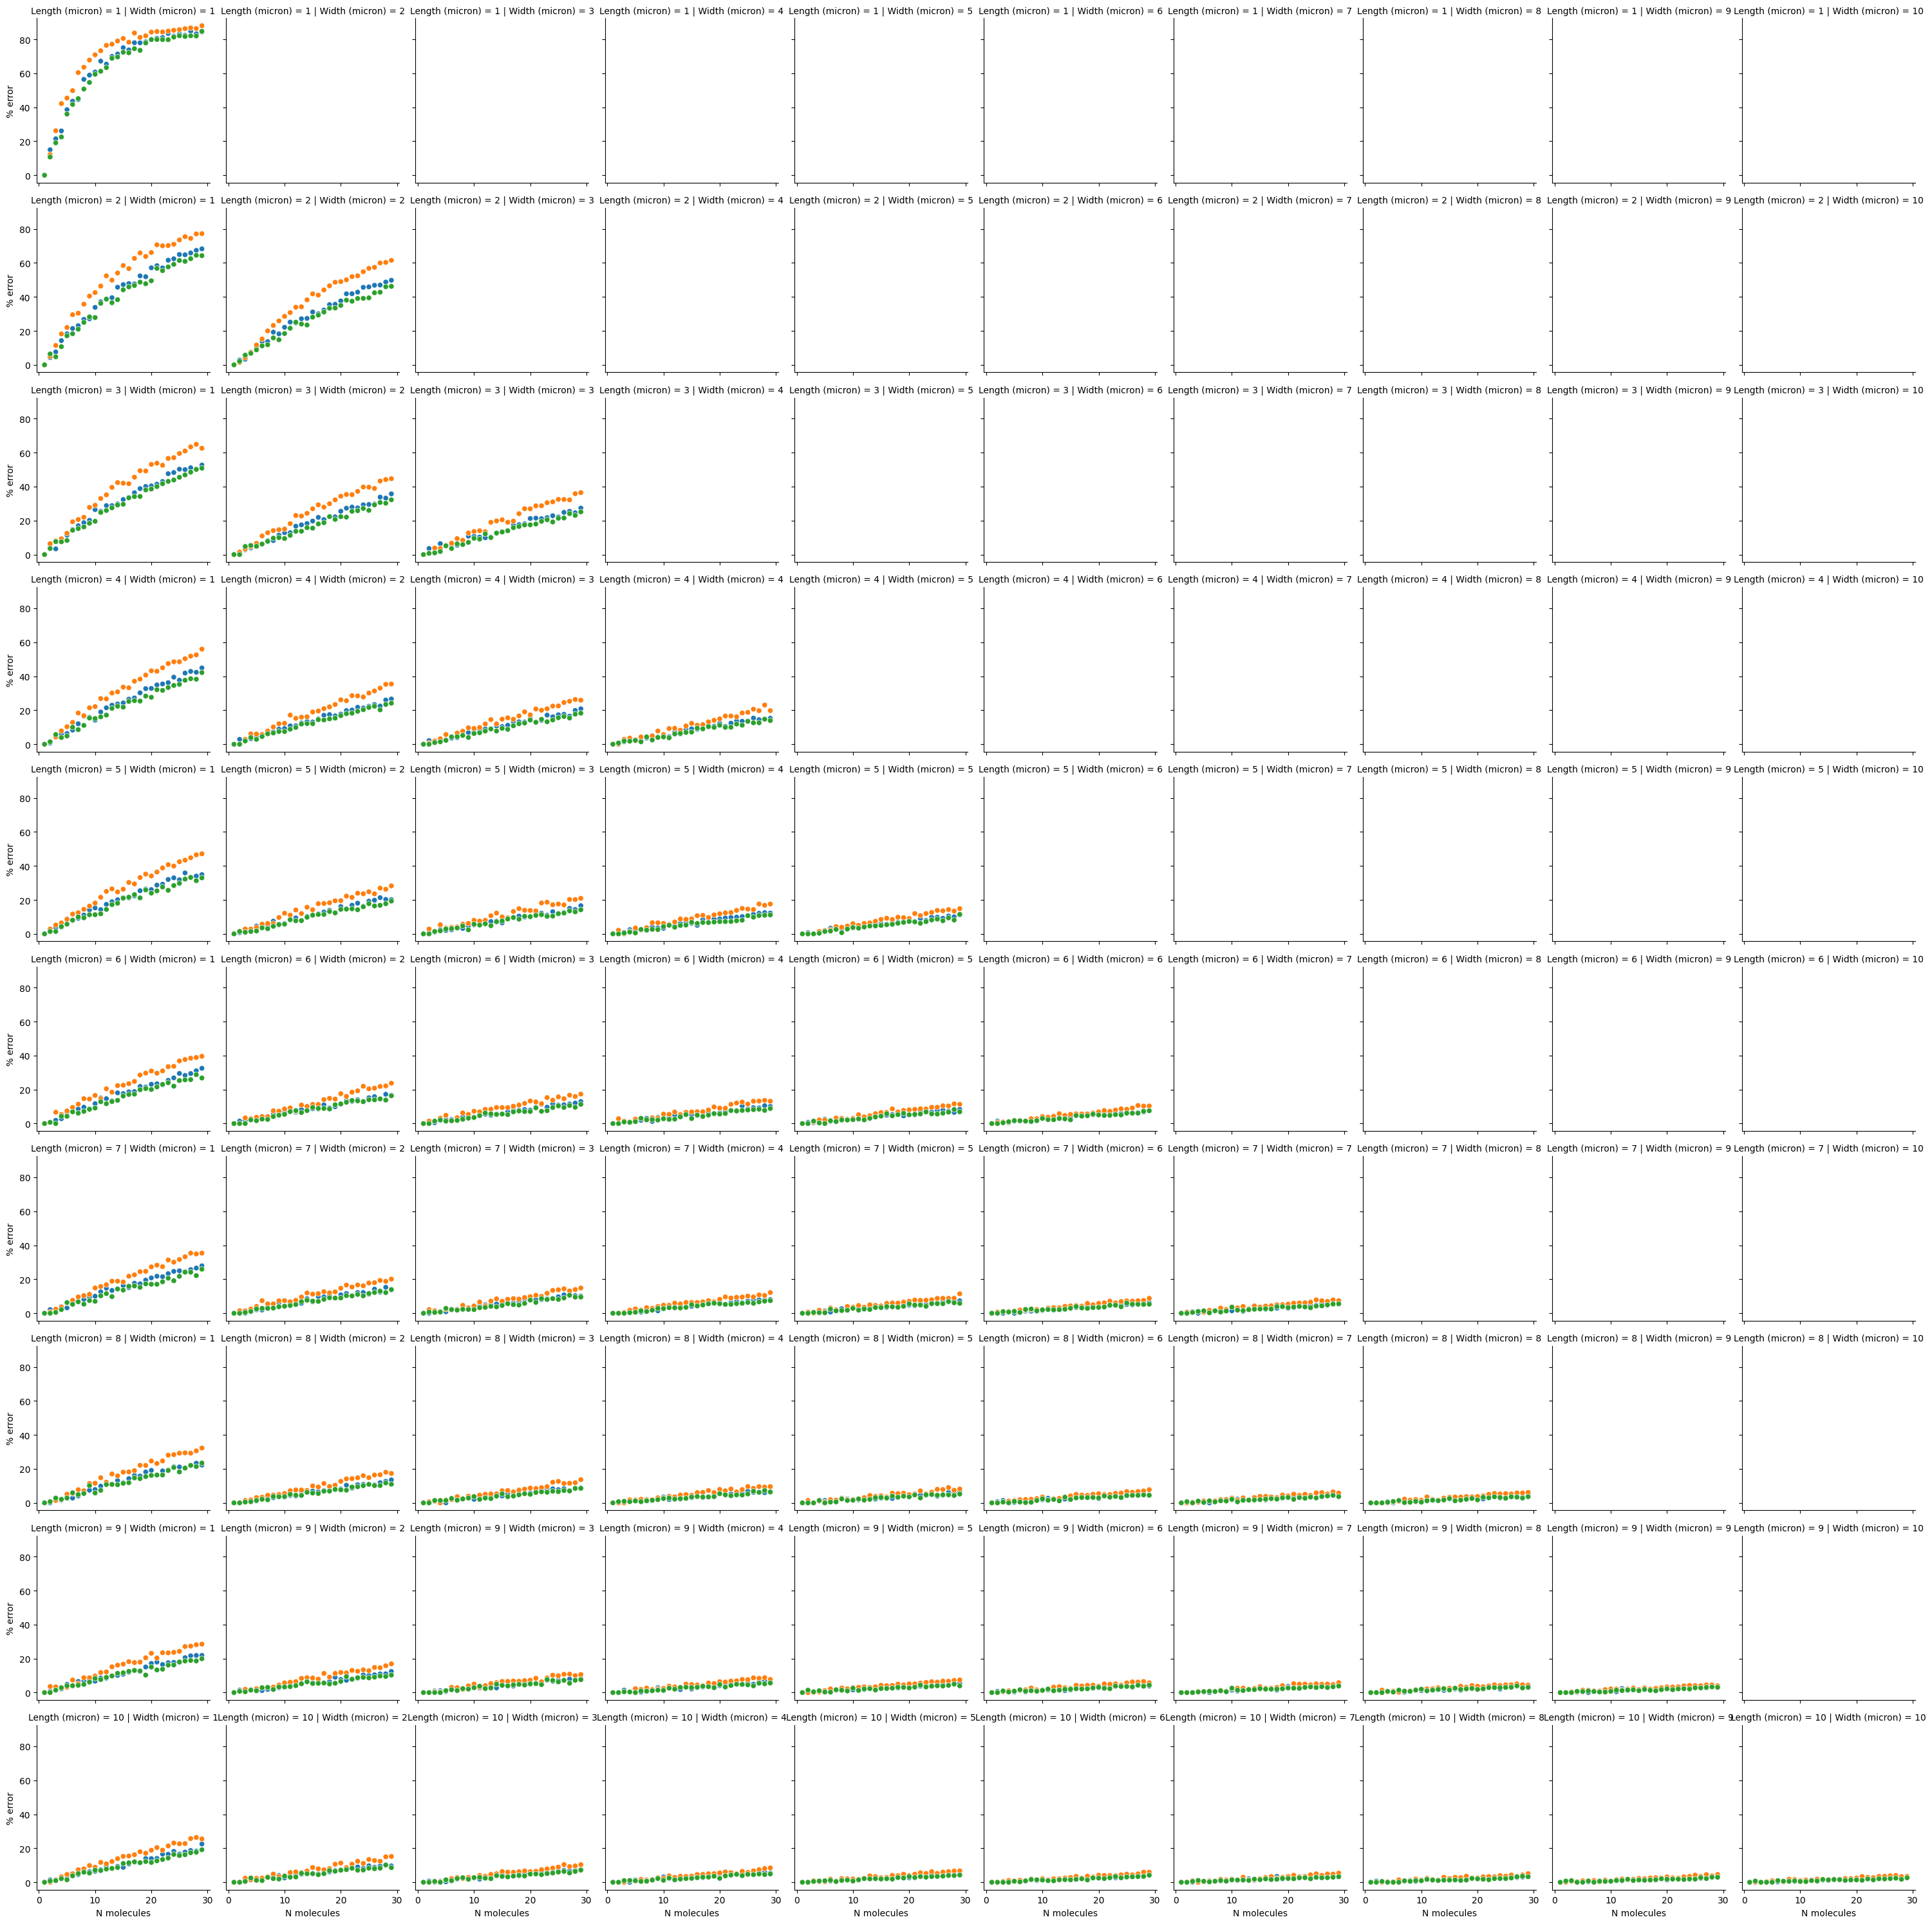

In [3]:
sim_output_mean = sim_output.groupby(["N molecules", "Length (micron)", "Width (micron)", "Diffraction Criterion"], as_index=False).mean()
g = sns.FacetGrid(data = sim_output_mean, row="Length (micron)", col = "Width (micron)")
g.map_dataframe(sns.scatterplot, x = "N molecules", y = "% error", hue="Diffraction Criterion")

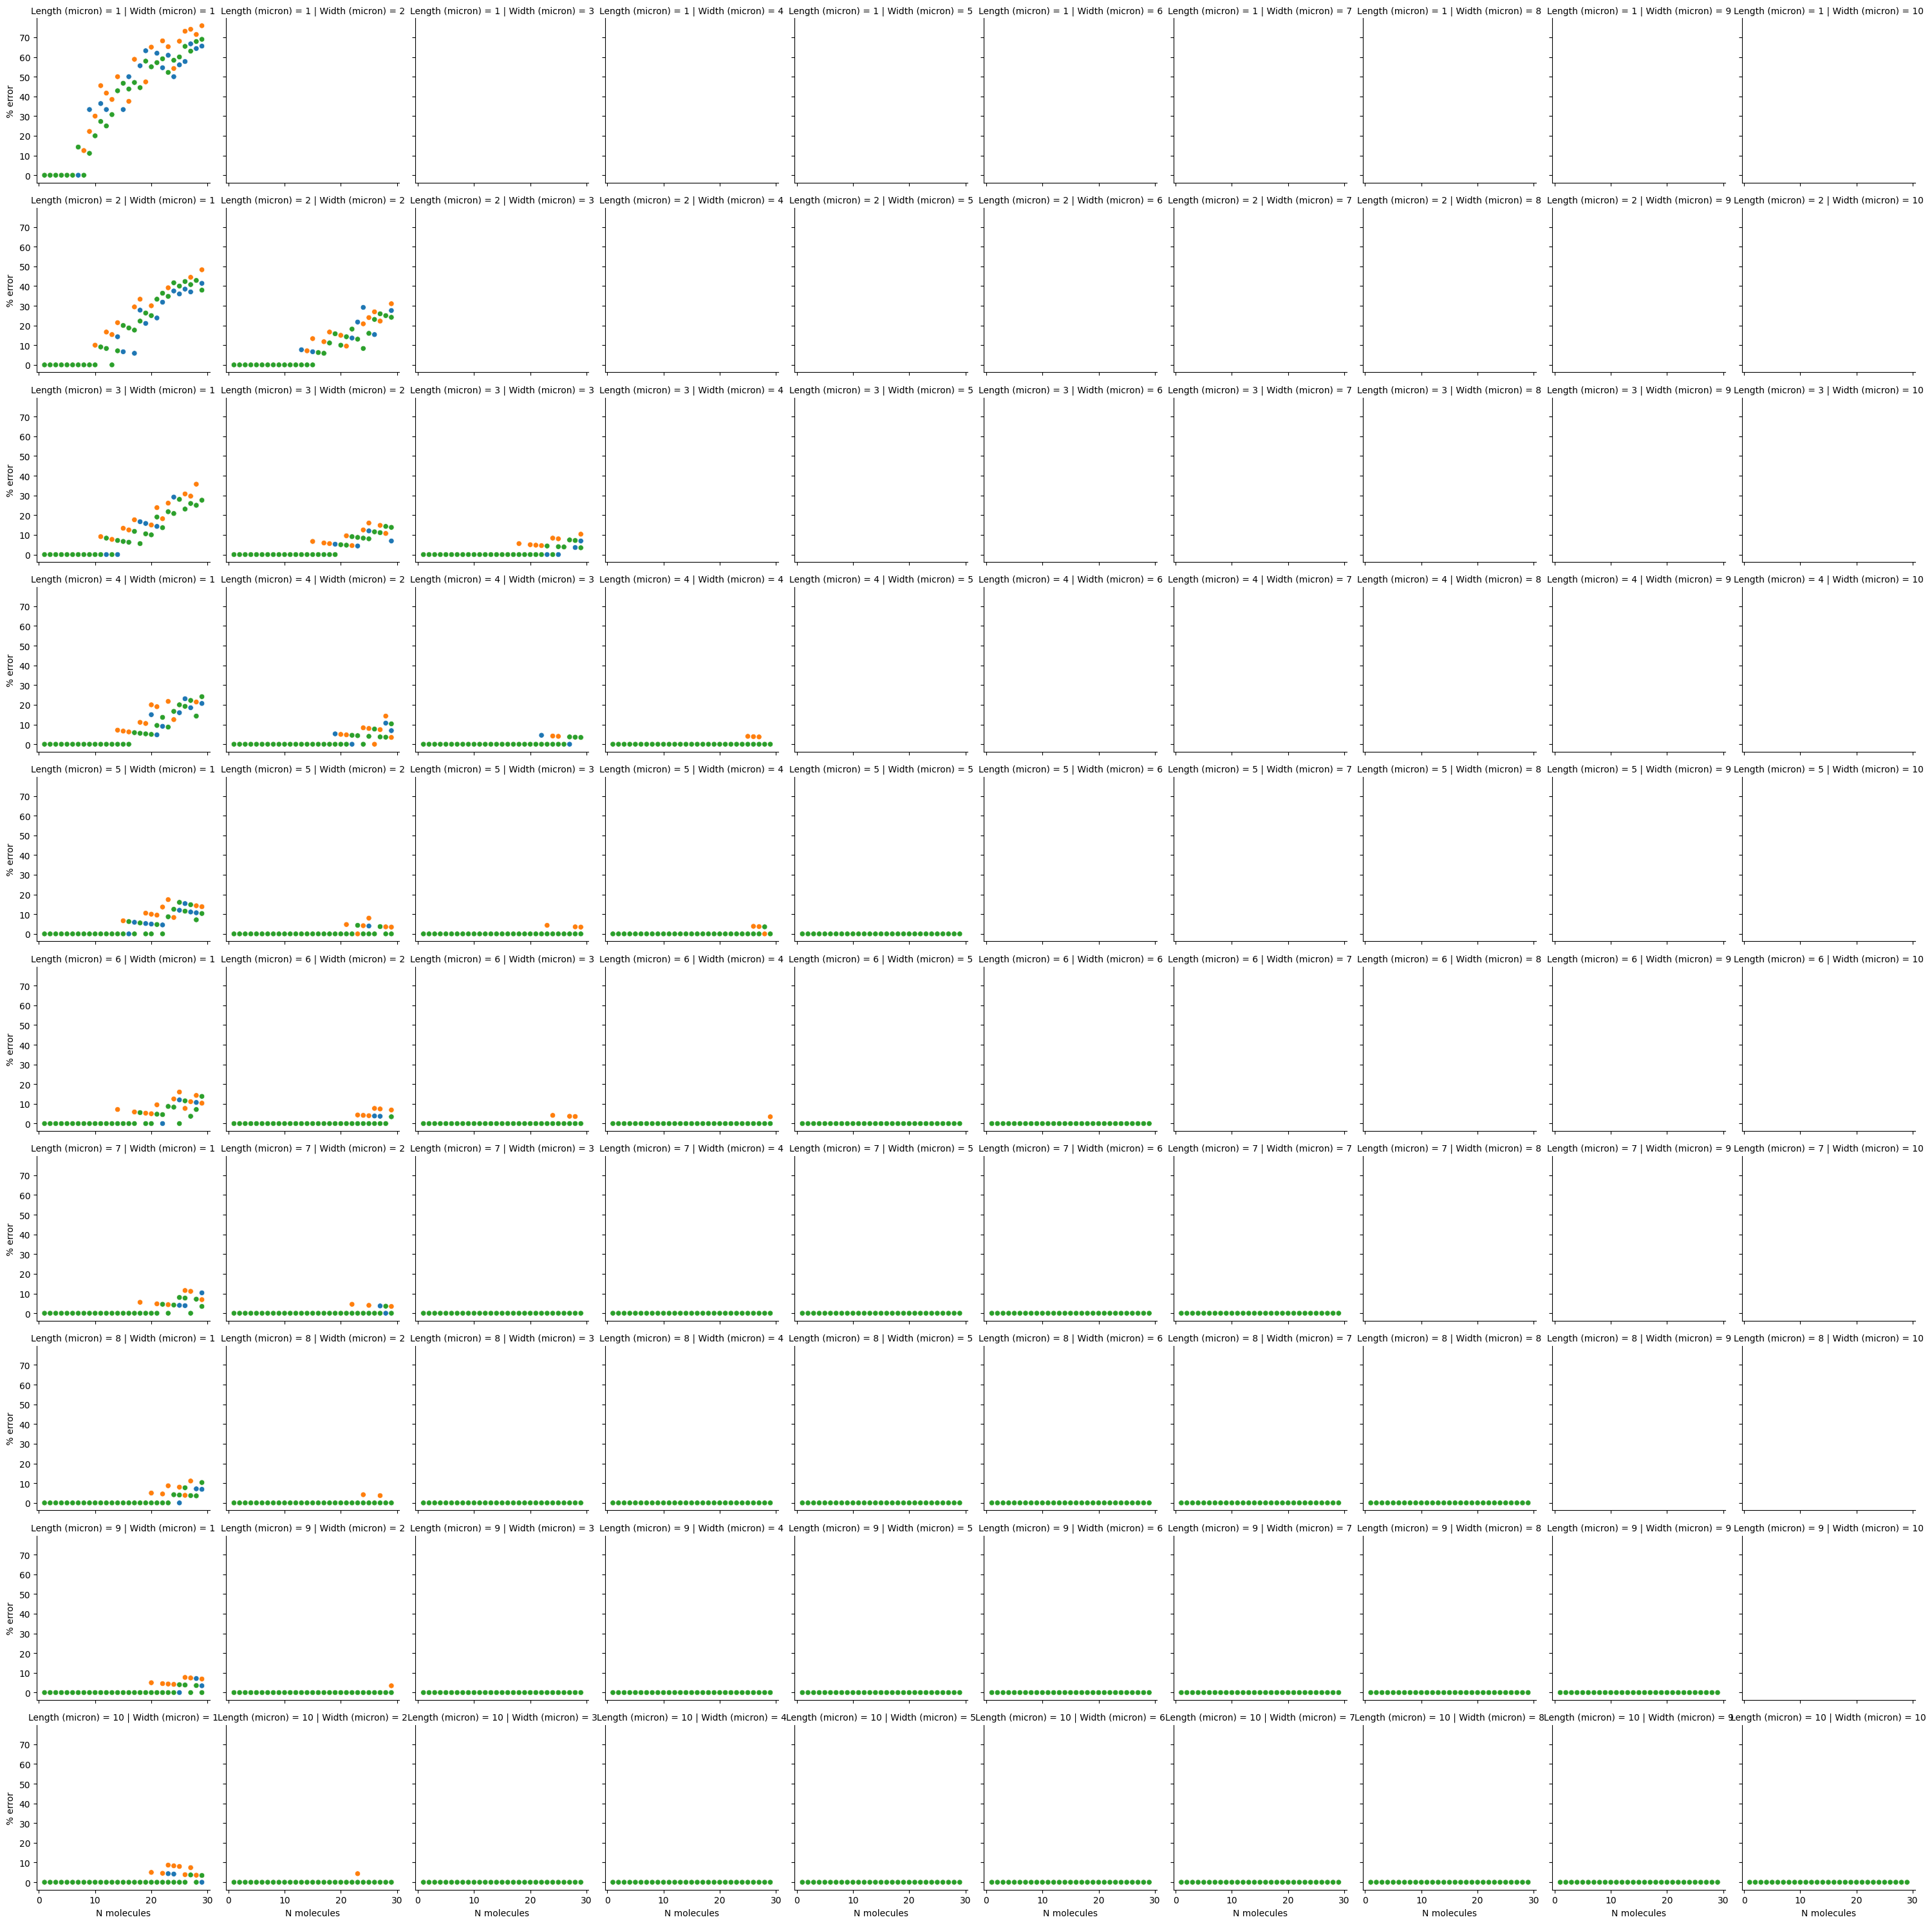

In [4]:
sim_output_max = sim_output.groupby(["N molecules", "Length (micron)", "Width (micron)", "Diffraction Criterion"], as_index=False).min()
g = sns.FacetGrid(data = sim_output_max, row="Length (micron)", col = "Width (micron)")
g.map_dataframe(sns.scatterplot, x = "N molecules", y = "% error", hue="Diffraction Criterion")